In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('/content/drive/MyDrive/data/Heart_Disease_Prediction.csv')
df.shape

(270, 14)

In [35]:
#df.head()
df['Heart Disease'].value_counts()

,count
Heart Disease,
Absence,150
Presence,120


In [36]:
#Convert Heart Disease text to Number
df['HeartMalignant'] = df['Heart Disease'].apply(lambda x: 1 if x=='Presence' else 0)

In [38]:
#Drop the text column
df.drop(columns=['Heart Disease'], axis='columns', inplace=True)
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,HeartMalignant
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [40]:
df.isnull().sum()

,0
Age,0
Sex,0
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,0
EKG results,0
Max HR,0
Exercise angina,0
ST depression,0


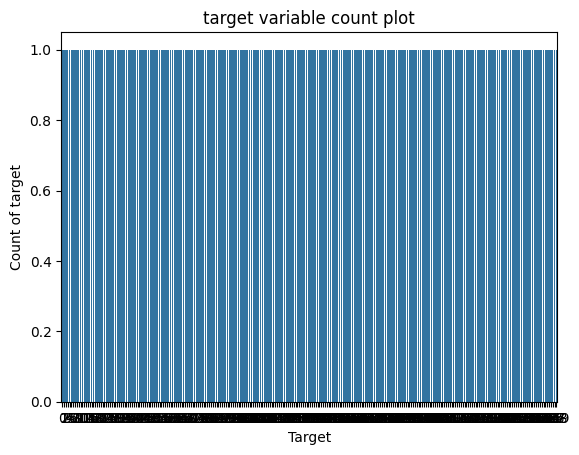

In [42]:
#lets plot the Heart disease Count Plot
sns.countplot(df['HeartMalignant'])
plt.xlabel("Target")
plt.ylabel("Count of target")
plt.title("target variable count plot")
plt.show()

In [47]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['HeartMalignant'], axis='columns')
y= df.HeartMalignant
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4589)

###Start Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion="gini",
                             max_depth=8,
                             min_samples_split=10,
                             random_state=5)

In [51]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [52]:
clf.feature_importances_

array([0.05500324, 0.0350982 , 0.12940328, 0.05138384, 0.06100417,
       0.00550127, 0.00803021, 0.09185017, 0.09142839, 0.13476532,
       0.04617555, 0.15154629, 0.13881005])

In [54]:
y_predict = clf.predict(X_test)
y_predict

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0])

###Plot Confusion matrix

In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[29,  0],
       [ 7, 18]])

###Check Accuracy Score

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.8703703703703703

### check Cross validation Score

In [58]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train, y_train, cv=10)

array([0.77272727, 0.90909091, 0.68181818, 0.77272727, 0.90909091,
       0.81818182, 0.76190476, 0.9047619 , 0.80952381, 0.9047619 ])

###check Classification Report

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=y_predict))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89        29
           1       1.00      0.72      0.84        25

    accuracy                           0.87        54
   macro avg       0.90      0.86      0.86        54
weighted avg       0.90      0.87      0.87        54



### Plot feature Importances

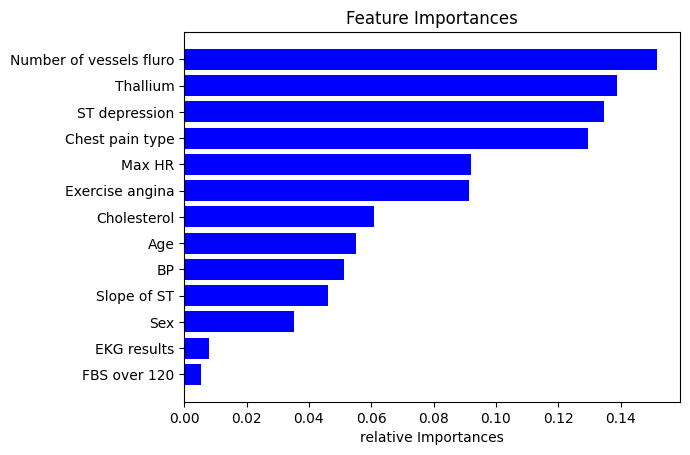

In [60]:
features = df.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('relative Importances')
plt.show()